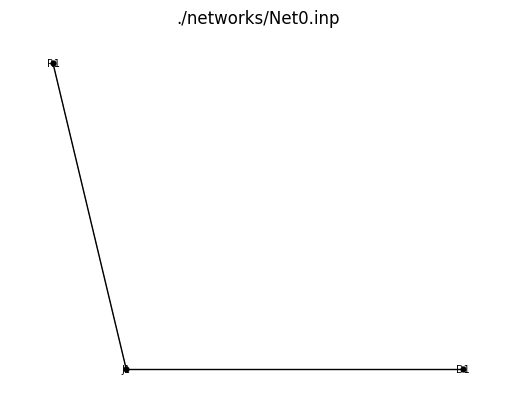

<Axes: title={'center': './networks/Net0.inp'}>

In [1]:
import wntr
import wntr_quantum
import numpy as np

# Create a water network model
inp_file = './networks/Net0.inp'
# inp_file = './networks/Net2LoopsDW.inp'
wn = wntr.network.WaterNetworkModel(inp_file)

# Graph the network
wntr.graphics.plot_network(wn, title=wn.name, node_labels=True)

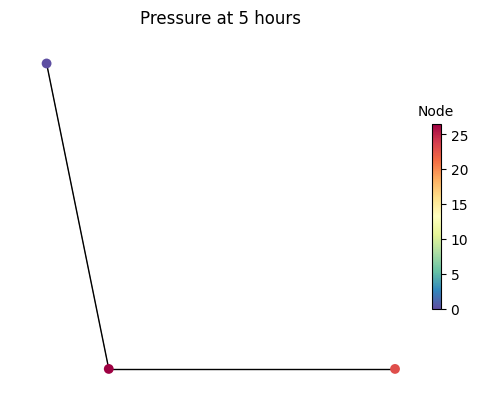

<Axes: title={'center': 'Pressure at 5 hours'}>

In [2]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()
# Plot results on the network
pressure_at_5hr = results.node['pressure'].loc[0, :]
wntr.graphics.plot_network(wn, node_attribute=pressure_at_5hr, node_size=50,
                        title='Pressure at 5 hours', node_labels=False)

In [3]:
results.node['pressure']

name,J1,D1,R1
0,26.476913,22.953829,-9.338379e-07
3600,26.476913,22.953829,-9.338379e-07


In [4]:
from wntr_quantum.sim.solvers.qubo_polynomial_solver import QuboPolynomialSolver
from qubops.solution_vector import SolutionVector_V2 as SolutionVector
from qubops.encodings import  RangedEfficientEncoding, PositiveQbitEncoding

nqbit = 7
step = (0.5/(2**nqbit-1))
flow_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+1.5, var_base_name="x")

nqbit = 7
step = (25/(2**nqbit-1))
head_encoding = PositiveQbitEncoding(nqbit=nqbit, step=step, offset=+95.0, var_base_name="x")

In [5]:
from wntr_quantum.design.qubo_pipe_diam import QUBODesignPipeDiameter 
pipe_diameters = [250, 500, 1000]
designer = QUBODesignPipeDiameter(wn, flow_encoding, head_encoding, pipe_diameters, head_lower_bound=80)

In [6]:
designer.verify_encoding()

Head Encoding : 95.000000 => 120.000000 (res: 0.196850)
Flow Encoding : 1.500000 => 2.000000 (res: 0.003937)


In [7]:
designer.compute_classical_solution([1,0,0,1,0,0], convert_to_si=True)

/home/nico/QuantumApplicationLab/QuantumNewtonRaphson/quantum_newton_raphson/utils.py:74: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn("spsolve requires A be CSC or CSR matrix format", SparseEfficiencyWarning)


array([ 0.05 ,  0.05 , 26.456, 22.911])

In [8]:
designer.enumerates_classical_solutions(convert_to_si=False)

price 	 diameters 	 variables
0.16907910944516957 [250. 250.] [ 1.766  1.766 84.718 71.01 ]
0.25361866416775436 [250. 500.] [ 1.766  1.766 82.639 78.088]
0.42269777361292393 [ 250. 1000.] [ 1.766  1.766 80.56  76.258]
0.25361866416775436 [500. 250.] [ 1.766  1.766 89.717 73.794]
0.33815821889033915 [500. 500.] [ 1.766  1.766 89.587 82.821]
0.5072373283355087 [ 500. 1000.] [ 1.766  1.766 89.457 82.94 ]
0.42269777361292393 [1000.  250.] [ 1.766  1.766 89.706 71.568]
0.5072373283355087 [1000.  500.] [ 1.766  1.766 89.699 80.718]
0.6763164377806783 [1000. 1000.] [ 1.766  1.766 89.693 80.96 ]


In [9]:
from dwave.samplers import SimulatedAnnealingSampler
from dwave.samplers import SteepestDescentSampler
options = {'sampler': SimulatedAnnealingSampler()}
status = designer.solve(strength=1E6, num_reads=10000, options=options)

/home/nico/miniconda3/envs/vitens_wntr_1/lib/python3.9/site-packages/dimod/binary/binary_quadratic_model.py:759: UserWarning: For constraints with fractional coefficients, multiply both sides of the inequality by an appropriate factor of ten to attain or approximate integer coefficients. 
  warnings.warn("For constraints with fractional coefficients, "


[1.68503937007874, 1.622047244094488, 96.37795275590551, 95.0]


In [10]:
designer.total_pice

0.6763164377806783

In [11]:
designer.optimal_diameters

array([1000., 1000.])